In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import tensorflow as tf
from tensorflow import keras


In [9]:
def create_dataframe(data_path):
    class_dict = {
        '0': 0,
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
        '6': 6,
        '7': 7,
        '8': 8,
        '9': 9,
    }
    image_paths = []
    image_outputs = []
    for c, output in class_dict.items():
        folder_path = os.path.join(data_path, c)
        for f in os.listdir(folder_path):
            f_path = os.path.join(folder_path, f)
            image_paths.append(f_path)
            image_outputs.append(output)
    df = pd.DataFrame({
        'path': image_paths,
        'output': image_outputs
    })
    return df

In [3]:
DATA_PATH = 'DATA/'
train_df = create_dataframe(os.path.join(DATA_PATH, 'digits_train_set'))
test_df = create_dataframe(os.path.join(DATA_PATH, 'digits_test_set'))

In [4]:
train_df

,path,output
0,DATA/digits_train_set\0\0 (1).jpg,0
1,DATA/digits_train_set\0\0 (10).jpg,0
2,DATA/digits_train_set\0\0 (100).jpg,0
3,DATA/digits_train_set\0\0 (101).jpg,0
4,DATA/digits_train_set\0\0 (102).jpg,0
...,...,...
6601,DATA/digits_train_set\9\9 (95).jpg,9
6602,DATA/digits_train_set\9\9 (96).jpg,9
6603,DATA/digits_train_set\9\9 (97).jpg,9
6604,DATA/digits_train_set\9\9 (98).jpg,9


In [5]:
test_df

,path,output
0,DATA/digits_test_set\0\0 (1).jpg,0
1,DATA/digits_test_set\0\0 (10).jpg,0
2,DATA/digits_test_set\0\0 (100).jpg,0
3,DATA/digits_test_set\0\0 (101).jpg,0
4,DATA/digits_test_set\0\0 (102).jpg,0
...,...,...
1409,DATA/digits_test_set\9\9 (95).jpg,9
1410,DATA/digits_test_set\9\9 (96).jpg,9
1411,DATA/digits_test_set\9\9 (97).jpg,9
1412,DATA/digits_test_set\9\9 (98).jpg,9


In [6]:
IMG_DIM = 128

def imread(img_path):
    img = cv2.imread(img_path)
    img = img.astype('float32')/255.0
    img = cv2.resize(img, (IMG_DIM, IMG_DIM))
    return img

def imshow(img, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()

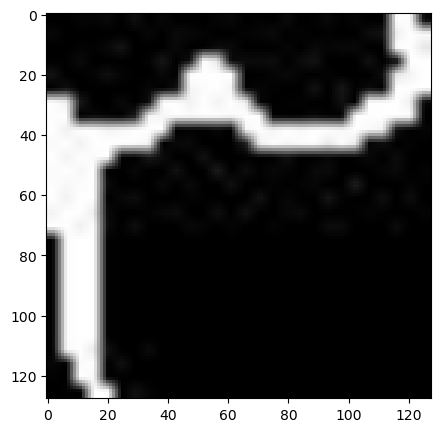

(128, 128, 3)

In [7]:
img_path = 'DATA/digits_train_set/3/3 (10).jpg'
img = imread(img_path)
imshow(img)
img.shape

In [10]:
def read_images(img_paths):
    n = len(img_paths)
    X = np.zeros((n, IMG_DIM, IMG_DIM, 3), dtype='float32')
    for i in tqdm(range(n)):
        path = img_paths[i]
        img = imread(path)
        X[i] = img
    return X

In [11]:
x_train = read_images(train_df['path'])
y_train = train_df['output']

x_test = read_images(test_df['path'])
y_test = test_df['output']

100%|██████████| 1414/1414 [00:04<00:00, 327.52it/s]


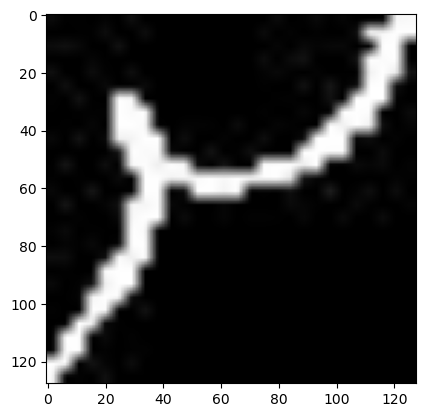

2


In [18]:
plt.imshow(x_train[1500])
#plt.colorbar()
#plt.xticks([])
#plt.yticks([])
plt.show()
print(y_train[1500])


In [19]:
model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(IMG_DIM,IMG_DIM,3)))
model.add(tf.keras.layers.Conv2D(110,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation ='relu'))
model.add(tf.keras.layers.Dense(128, activation ='relu'))
model.add(tf.keras.layers.Dense(10, activation ='softmax'))

In [20]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train , epochs = 3)

Epoch 1/3
207/207 [==============================] - 1117s 5s/step - loss: 0.3756 - accuracy: 0.8771
Epoch 2/3
207/207 [==============================] - 1131s 5s/step - loss: 0.1132 - accuracy: 0.9681
Epoch 3/3
207/207 [==============================] - 1152s 6s/step - loss: 0.0492 - accuracy: 0.9862


In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

45/45 [==============================] - 93s 1s/step - loss: 0.1340 - accuracy: 0.9646
Test accuracy: 0.9646393060684204


In [26]:
y_pred = model.predict(x_test)


45/45 [==============================] - 47s 1s/step


In [23]:
code = {'0':0 ,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}

def getcode(n):
    for x , y in code.items():
        if n == y:
            return x

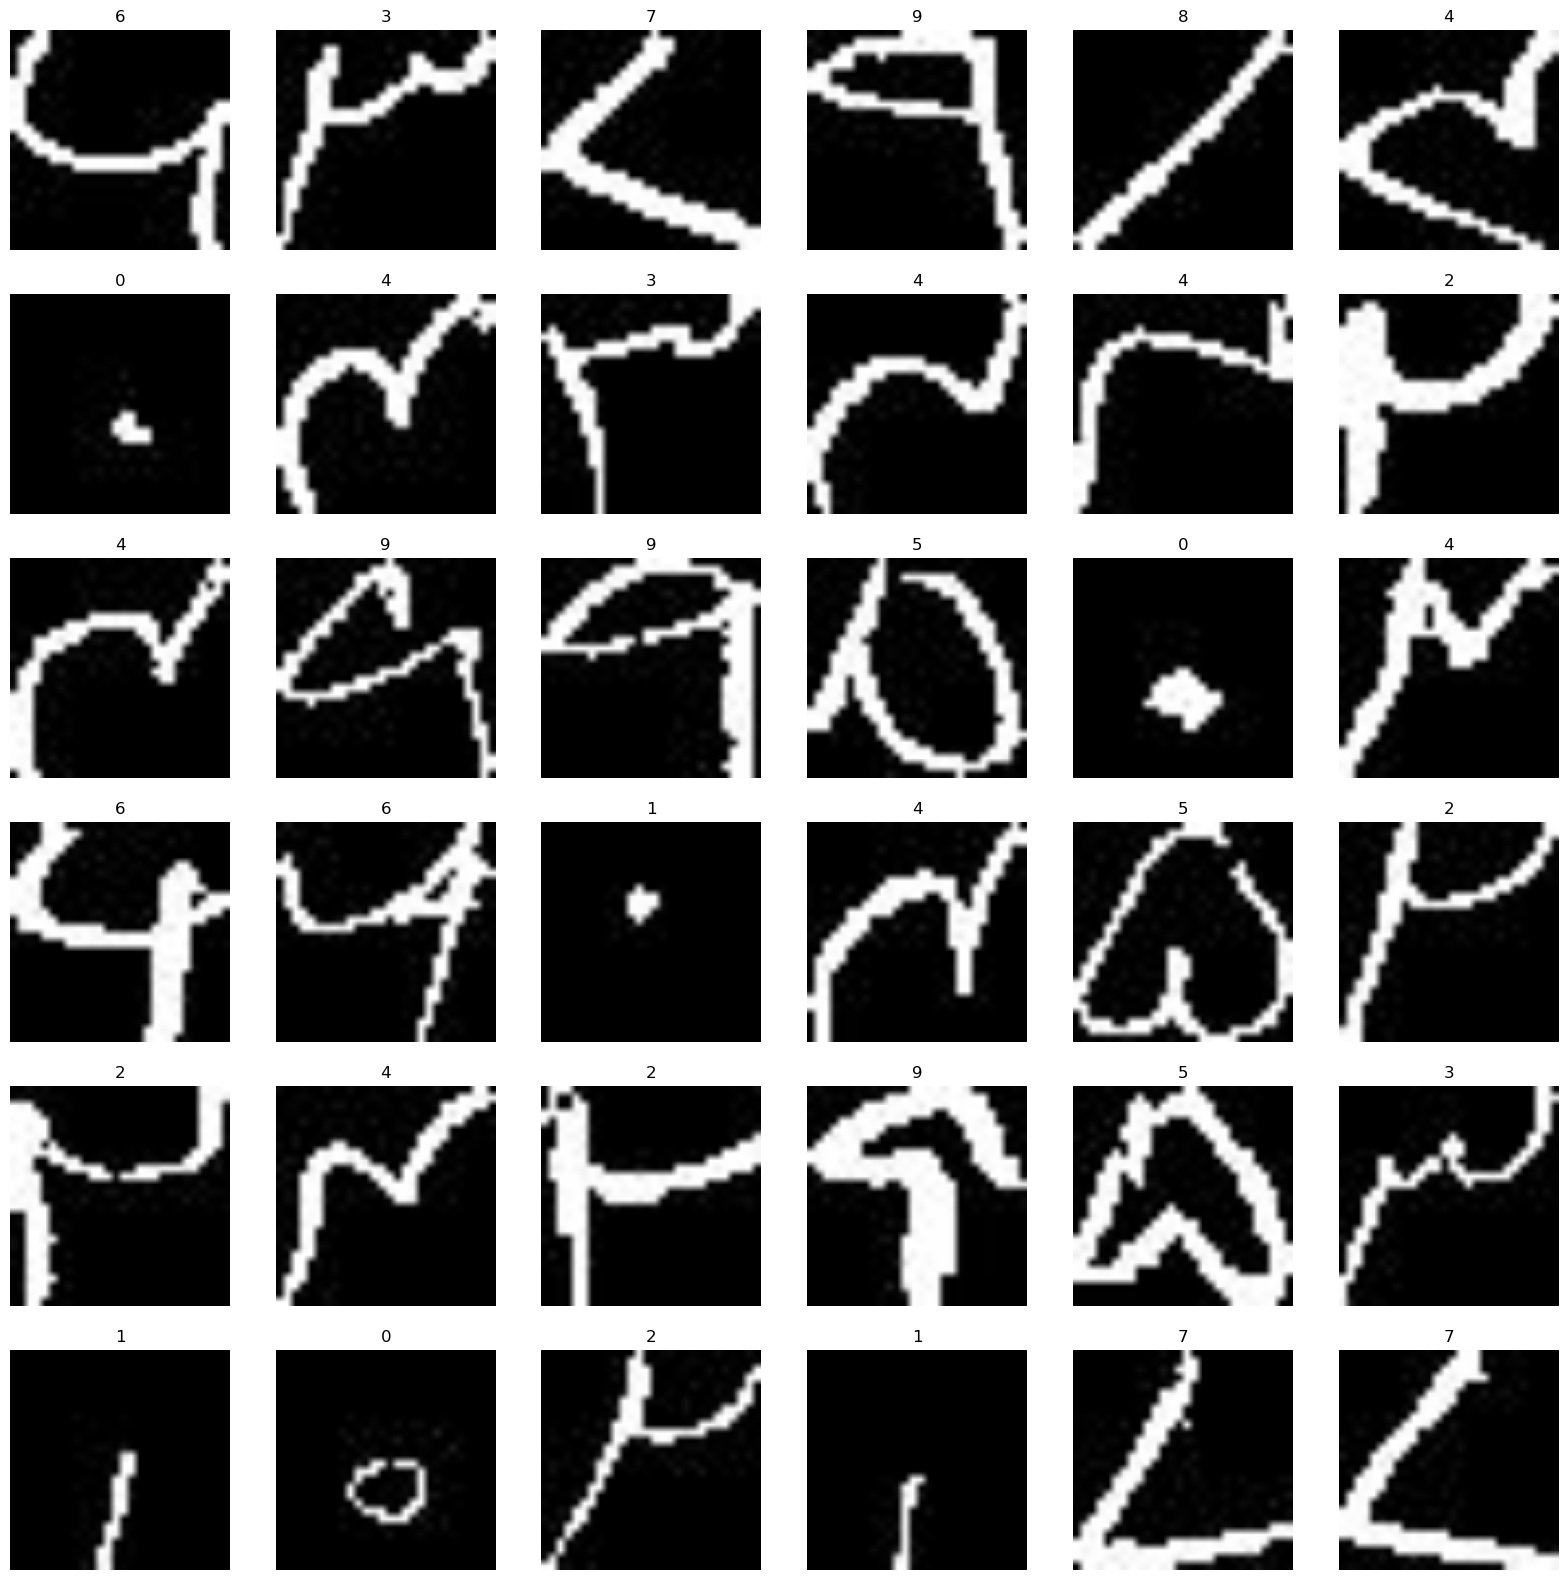

In [28]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))